In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 import
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import random

print(tf.__version__)

2.2.0


In [5]:
class_names = os.listdir("../../feature/feature_fbank/")
class_names.sort()

print(class_names)

['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019740014_leesumin', '2017019740015_choihayoung', '2017019740016_kangyeseo', '2017019740017_kwakmihyang', '2017019740018_eundano', '2017019740019_limjinju', '2017019740020_kimseongje', '2017019740021_kwakbokyeong', '2017019740022_ahnhyojin', '2017019740023_heosehun', '2017019740024_choijiwon', '2017019740025_ahnjeongsuk', '2017019740026_parkyeongseon', '2017019740027_kwaksangpil', '2017019740028_kodohyeon', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeonsanghyeok', '2017019770006_jennie', '2017019770007_simseungmin', '2017019770008_parkso

In [6]:
x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir("../../feature/feature_fbank/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

2017019740001
2017019740001_kwakjuheon_4.npy 0
2017019740001_kwakjuheon_1.npy 1
2017019740001_kwakjuheon_0.npy 2
2017019740001_kwakjuheon_2.npy 3
2017019740001_kwakjuheon_3.npy 4
2017019740002
2017019740002_kimjiho_3.npy 0
2017019740002_kimjiho_1.npy 1
2017019740002_kimjiho_2.npy 2
2017019740002_kimjiho_4.npy 3
2017019740002_kimjiho_0.npy 4
2017019740003
2017019740003_songyejin_2.npy 0
2017019740003_songyejin_3.npy 1
2017019740003_songyejin_4.npy 2
2017019740003_songyejin_1.npy 3
2017019740003_songyejin_0.npy 4
2017019740004
2017019740004_parksohui_2.npy 0
2017019740004_parksohui_1.npy 1
2017019740004_parksohui_3.npy 2
2017019740004_parksohui_0.npy 3
2017019740004_parksohui_4.npy 4
2017019740005
2017019740005_moonyeonwoo_3.npy 0
2017019740005_moonyeonwoo_2.npy 1
2017019740005_moonyeonwoo_0.npy 2
2017019740005_moonyeonwoo_4.npy 3
2017019740005_moonyeonwoo_1.npy 4
2017019740006
2017019740006_kangsubin_3.npy 0
2017019740006_kangsubin_1.npy 1
2017019740006_kangsubin_4.npy 2
2017019740006_k

2017019880003
2017019880003_kimminji_1.npy 0
2017019880003_kimminji_4.npy 1
2017019880003_kimminji_2.npy 2
2017019880003_kimminji_0.npy 3
2017019880003_kimminji_3.npy 4
2017019880004
2017019880004_myeongjaewon_2.npy 0
2017019880004_myeongjaewon_1.npy 1
2017019880004_myeongjaewon_0.npy 2
2017019880004_myeongjaewon_4.npy 3
2017019880004_myeongjaewon_3.npy 4
2017019880005
2017019880005_kimjihyeon_1.npy 0
2017019880005_kimjihyeon_0.npy 1
2017019880005_kimjihyeon_4.npy 2
2017019880005_kimjihyeon_3.npy 3
2017019880005_kimjihyeon_2.npy 4
2017019880006
2017019880006_choisuyeon_3.npy 0
2017019880006_choisuyeon_4.npy 1
2017019880006_choisuyeon_1.npy 2
2017019880006_choisuyeon_2.npy 3
2017019880006_choisuyeon_0.npy 4
2017019880007
2017019880007_hwanghyebin_4.npy 0
2017019880007_hwanghyebin_2.npy 1
2017019880007_hwanghyebin_1.npy 2
2017019880007_hwanghyebin_3.npy 3
2017019880007_hwanghyebin_0.npy 4
2017019880008
2017019880008_jangsoojin_3.npy 0
2017019880008_jangsoojin_0.npy 1
2017019880008_jangso

In [7]:
x_train = np.array(x_list)
y_train = np.array(y_list)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

x_train: (490, 40, 469)
y_train: (490,)


In [8]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (392, 40, 469)
y_train: (392,)
x_val: (98, 40, 469)
y_val: (98,)


In [9]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [10]:
x_train = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1)
x_val   = x_val.reshape(-1, x_val.shape[1], x_val.shape[2], 1)

In [11]:
print("x_train:", x_train.shape)
print("y_train:", y_train_encoded.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val_encoded.shape)

x_train: (392, 40, 469, 1)
y_train: (392, 98)
x_val: (98, 40, 469, 1)
y_val: (98, 98)


In [12]:
print(np.min(x_train), np.max(x_train))
x_train = x_train - np.min(x_train)

print(np.min(x_train), np.max(x_train))
x_train = x_train / np.max(x_train)

print(np.min(x_train), np.max(x_train))

print(np.min(x_val), np.max(x_val))
x_val = x_val - np.min(x_val)

print(np.min(x_val), np.max(x_val))
x_val = x_val / np.max(x_val)

print(np.min(x_val), np.max(x_val))

-100.0 46.15295
0.0 146.15295
0.0 1.0
-100.0 44.11407
0.0 144.11407
0.0 1.0


In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout

In [14]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()

conv2.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(x_train.shape[1], x_train.shape[2], 1)))
# conv2.add(MaxPooling2D((2, 2)))
conv2.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Dropout(0.5))

conv2.add(Flatten())
# conv2.add(Dense(640, activation="relu"))
# conv2.add(Dense(128, activation="relu"))
conv2.add(Dropout(0.25))
conv2.add(Dense(y_train_encoded.shape[1], activation="softmax"))

In [15]:
conv2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 469, 32)       320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 469, 64)       18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 234, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 234, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 299520)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 299520)            0         
_________________________________________________________________
dense (Dense)                (None, 98)                2

In [16]:
conv2.compile(optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.0, decay=0.0, nesterov=False), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [17]:
history = conv2.fit(x_train, y_train_encoded, batch_size=4, epochs=20, verbose=1, validation_data=(x_val, y_val_encoded))

Epoch 1/20
98/98 [==============================] - 10s 106ms/step - loss: 4.7933 - accuracy: 0.0051 - val_loss: 4.5849 - val_accuracy: 0.0204
Epoch 2/20
98/98 [==============================] - 10s 106ms/step - loss: 4.5910 - accuracy: 0.0026 - val_loss: 4.5849 - val_accuracy: 0.0102
Epoch 3/20
98/98 [==============================] - 10s 106ms/step - loss: 4.5910 - accuracy: 0.0000e+00 - val_loss: 4.5848 - val_accuracy: 0.0102
Epoch 4/20
98/98 [==============================] - 10s 105ms/step - loss: 4.5911 - accuracy: 0.0000e+00 - val_loss: 4.5847 - val_accuracy: 0.0204
Epoch 5/20
98/98 [==============================] - 10s 106ms/step - loss: 4.5913 - accuracy: 0.0026 - val_loss: 4.5846 - val_accuracy: 0.0102
Epoch 6/20
98/98 [==============================] - 10s 105ms/step - loss: 4.5911 - accuracy: 0.0051 - val_loss: 4.5841 - val_accuracy: 0.0102
Epoch 7/20
98/98 [==============================] - 10s 105ms/step - loss: 4.5918 - accuracy: 0.0000e+00 - val_loss: 4.5822 - val_accu

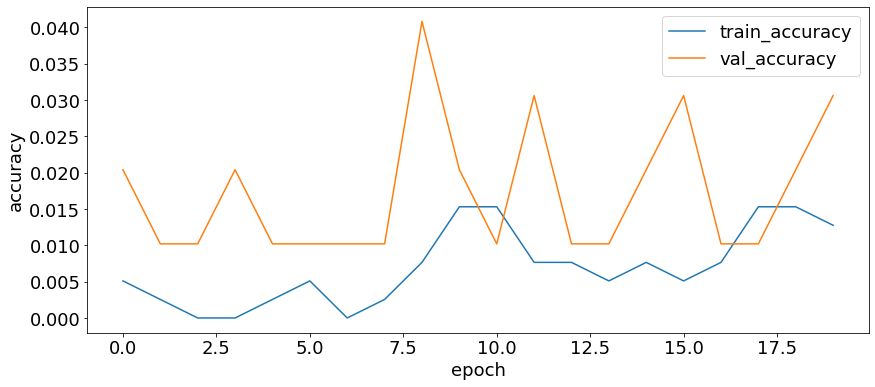

In [18]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [19]:
x_validation_list=[]
y_validation_list=[]

val_class_names = os.listdir("../../feature/feature_fbank_validation/")
val_class_names.sort()

for i in range(0,len(val_class_names)):
    val_files=os.listdir("../../feature/feature_fbank_validation/"+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]

    for j in range(0, len(val_files)):
        x = np.load("../../feature/feature_fbank_validation/"+val_class_names[i]+"/"+val_files[j])
       
        x_validation_list.append(x)
        y_validation_list.append(i)


# print(y_val_list)

x_validation = np.array(x_validation_list)
y_validation = np.array(y_validation_list)
y_validation_encoded = tf.keras.utils.to_categorical(y_validation)

x_validation = x_validation.reshape(-1, x_validation.shape[1], x_validation.shape[2], 1)

x_validation = x_validation - np.min(x_validation)
x_validation = x_validation / np.max(x_validation)
for k in range(0, len(x_validation)):
    
    kt = x_validation[k].reshape(-1, x_validation.shape[1], x_validation.shape[2], 1)
    predictions_single = conv2.predict(kt)
    print("Predict :",class_names[np.argmax(predictions_single)].split('_')[1]+str(","), \
          "Real :",val_class_names[y_validation[k]].split('_')[1])
    print()

Predict : kwakmihyang, Real : kwakjuheon

Predict : kwakbokyeong, Real : kwakjuheon

Predict : kwaksangpil, Real : kwakjuheon

Predict : kwakmihyang, Real : kwakjuheon

Predict : kwaksangpil, Real : kwakjuheon

Predict : yuminji, Real : kimsubin

Predict : yuminji, Real : kimsubin

Predict : yuminji, Real : kimsubin

Predict : yuminji, Real : kimsubin

Predict : yuminji, Real : kimsubin

